## IMPORTS

In [136]:
import numpy as np 
from numpy import exp

import pandas as pd
from matplotlib import pyplot as plt


## Reading csv

In [137]:
df = pd.read_csv('digit-recognizer-Data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Converting df to numpy array so we can work with it.

In [138]:
data = np.array(df)
numOfExamples, numOfFeatures = data.shape # num of features will be num of features +1 due to the label column.
np.random.shuffle(data)

data_test = data[0:1000].T  # Transpose the data to have features and the label as rows and examples as columns.
Y_test = data_test[0]  # The first row is the label.
X_test = data_test[1:numOfFeatures]   # The rest of the rows are the features.
X_test = X_test / 255

data_train = data[1000:numOfExamples].T  # Transpose the data to have features and the label as rows and examples as columns.
Y_train = data_train[0]  # Labels
X_train = data_train[1:numOfFeatures]   # The rest of the rows are the features.
X_train = X_train / 255 # Normalize the data to be between 0 and 1.






## Checking labels are loaded correctly

In [139]:
Y_train

array([4, 9, 1, ..., 7, 8, 1], dtype=int64)

## Function to one hot encode

In [140]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

## Initializing parameters.

In [141]:
def init_params():
    W1 = np.random.rand(10,784) -0.5 
    # 10 is the number of classes(in this case numbers from 0-9) and 784 is the number of features(in this case the pixel values from 0-255).
    B1 = np.random.rand(10,1) -0.5
    W2 = np.random.rand(10,10) -0.5 # defines weights for the second layer
    B2 = np.random.rand(10,1) -0.5
    return W1,B1,W2,B2

    

## Defining evaluation functions

In [142]:
def get_accuracy(predications,Y): # Y is the label
    return np.sum(predications == Y)/Y.size

def get_predications(A2): # A2 is the output of the second layer.
    return np.argmax(A2,0)

## Defining activation funtion

In [143]:


def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def derive_ReLU(Z):
    return Z > 0

# These activation functions are used to remove linearity , otherwise the Neural Network will be just a  fancy linear regression model.

## Defining Forward propagation

In [144]:
def forward_propagation(W1,B1,W2,B2,X):
    Z1 = W1.dot(X) + B1 #Z1 is the unactivated output of the first layer, where it is defined as W1 multiplied by the input layer and the product has bias (b1) added to it.
    A1 = ReLU(Z1) #A1 is the activated output of the first layer, where the unactivated output is passed through the ReLU activation function.
    Z2 = W2.dot(A1) + B2 #Z2 is the unactivated output of the second layer, where it is defined as W2 multiplied by the activated output of the first layer and the product has bias (b2) added to it.
    A2 = softmax(Z2) #A2 is the activated output of the second layer, where the unactivated output is passed through the softmax activation function to get the probabilities of each class.
    return Z1,A1,Z2,A2


## Defining backwards propagation to adjust weights and biases

In [152]:
def backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot(Y) # Convert the label to one hot encoding.
    dZ2 = A2 - one_hot_Y # Calculate the error of the second layer.
    dW2 = 1/numOfExamples * dZ2.dot(A1.T) # Calculate the gradient of the weights of the second layer.
    dB2 = 1/numOfExamples * np.sum(dZ2) # Calculate the gradient of the bias of the second layer.
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1) 
    dW1 = 1/numOfExamples * dZ1.dot(X.T) # Calculate the gradient of the weights of the first layer.
    dB1 = 1/numOfExamples * np.sum(dZ1) # Calculate the gradient of the bias of the first layer.
    return dW1,dB1,dW2,dB2



   

## Defining update param function

In [146]:
def update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha):
    W1 =W1 - alpha * dW1
    B1 =B1 - alpha * dB1
    W2 =W2 - alpha * dW2
    B2 =B2 - alpha * dB2
    return W1,B1,W2,B2


  

## Gradient decent

In [153]:
def gradient_descent(X,Y,iterations,alpha):
    W1,B1,W2,B2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_propagation(W1,B1,W2,B2,X)
      
        dW1,dB1,dW2,dB2 = backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y)
        # print("dW1: ",dW1)
        # print("dB1: ",dB1)
        # print("dW2: ",dW2)
        # print("dB2: ",dB2)
        W1,B1,W2,B2 = update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha)

        # print("No of Examples: ",noOfExamples)
        
        if i % 10 == 0:
            print("Iteration: ",i)
            predications = get_predications(A2)
            print("Accuracy",get_accuracy(predications,Y))
            
    return W1,B1,W2,B2

## Running gradient descent

In [154]:
W1,B1,W2,B2 = gradient_descent(X_train,Y_train,500,0.1)


Iteration:  0
Accuracy 0.05629268292682927
Iteration:  10
Accuracy 0.16395121951219513
Iteration:  20
Accuracy 0.2373170731707317
Iteration:  30
Accuracy 0.30153658536585365
Iteration:  40
Accuracy 0.37346341463414634
Iteration:  50
Accuracy 0.44541463414634147
Iteration:  60
Accuracy 0.5120487804878049
Iteration:  70
Accuracy 0.5652195121951219
Iteration:  80
Accuracy 0.6067560975609756
Iteration:  90
Accuracy 0.640390243902439
Iteration:  100
Accuracy 0.6647317073170732
Iteration:  110
Accuracy 0.6853902439024391
Iteration:  120
Accuracy 0.7020243902439024
Iteration:  130
Accuracy 0.7155365853658536
Iteration:  140
Accuracy 0.7268292682926829
Iteration:  150
Accuracy 0.7374146341463415
Iteration:  160
Accuracy 0.7470731707317073
Iteration:  170
Accuracy 0.7546829268292683
Iteration:  180
Accuracy 0.7616585365853659
Iteration:  190
Accuracy 0.7686341463414634
Iteration:  200
Accuracy 0.7746829268292683
Iteration:  210
Accuracy 0.780390243902439
Iteration:  220
Accuracy 0.7857804878048

## Results 

In [167]:
def make_predictions(X,W1,B1,W2,B2):
    _,_,_,A2 = forward_propagation(W1,B1,W2,B2,X)
    predications = get_predications(A2)
    return predications

def test_prediction(index,W1,B1,W2,B2):
    current_image = X_test[:,index,None]
    predications = make_predictions(X_train[:,index,None],W1,B1,W2,B2)
    print("Prediction: ",predications)
    print("Label: ",Y_train[index])
    plt.imshow(X_train[:,index].reshape(28,28),cmap='gray')
    plt.show()

Prediction:  [4]
Label:  4


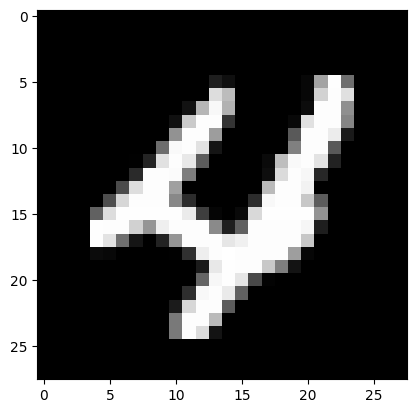

In [168]:
test_prediction(0,W1,B1,W2,B2)

Prediction:  [5]
Label:  5


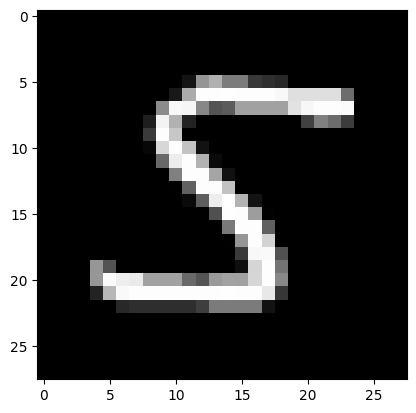

In [169]:
test_prediction(9,W1,B1,W2,B2)

Prediction:  [8]
Label:  8


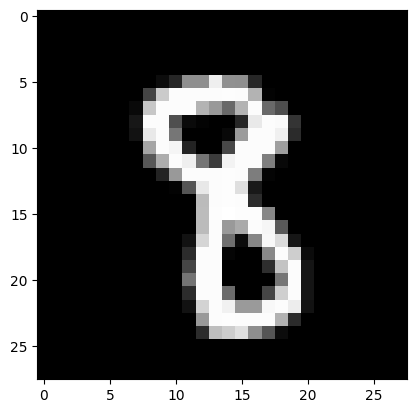

In [170]:
test_prediction(14,W1,B1,W2,B2)

## Evaluation 

In [173]:
dev_predictions = make_predictions(X_test, W1, B1, W2, B2)
print("Accuracy",get_accuracy(dev_predictions, Y_test)*100,"%")

Accuracy 85.39999999999999 %
